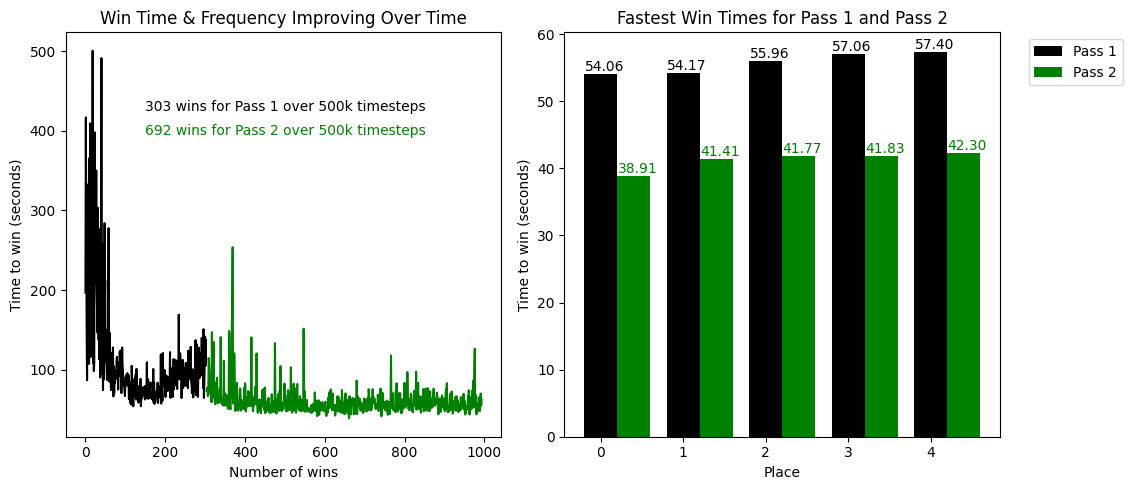

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

file_path = './logs/levelbeats.csv'
data = pd.read_csv(file_path, header=None, names=['Win Times'])
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax0 = plt.subplot(gs[0])
ax0.plot(data['Win Times'][0:303] / 70, color='black')
ax0.plot(data['Win Times'][304:] / 70, color='green')
ax0.set_title('Win Time & Frequency Improving Over Time')
ax0.set_ylabel('Time to win (seconds)')
ax0.set_xlabel('Number of wins')
ax0.text(150, 430, '303 wins for Pass 1 over 500k timesteps', color='black', verticalalignment='center', horizontalalignment='left')
ax0.text(150, 400, '692 wins for Pass 2 over 500k timesteps', color='green', verticalalignment='center', horizontalalignment='left')

fastest_pass1 = data[0:300].nsmallest(5, 'Win Times')
fastest_pass2 = data.nsmallest(5, 'Win Times')

ax1 = plt.subplot(gs[1])
width = 0.4
indices = range(len(fastest_pass1))
indices_pass2 = [index + width for index in indices]

bars1 = ax1.bar(indices, fastest_pass1['Win Times'] / 70, width=width, label='Pass 1', color='black')
bars2 = ax1.bar(indices_pass2, fastest_pass2['Win Times'] / 70, width=width, label='Pass 2', color='green')

ax1.set_title('Fastest Win Times for Pass 1 and Pass 2')
ax1.set_ylabel('Time to win (seconds)')
ax1.set_xlabel('Place')
ax1.legend()

for bar in bars1:
	yval = bar.get_height()
	ax1.text(bar.get_x() + bar.get_width()/100.0, yval, f'{yval:.2f}', va='bottom', color='black')
for bar in bars2:
	yval = bar.get_height()
	ax1.text(bar.get_x() + bar.get_width()/100.0, yval, f'{yval:.2f}', va='bottom', color='green')

plt.tight_layout(rect=[0, 0, 0.85, 1]) 
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()